<p style="text-align:center"> <h1>Tunisian Apartments market EDA </h1><p/>

<html>
<head>
</head>
<body>

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Phase1">Phase 1: Data Collection</a></li>
        <li><a href="#Phase2">Phase 2: Data Cleaning and Preprocessing</a></li>
        <li><a href="#Phase3">Phase 3: Exploratory Data Analysis (EDA)</a></li>
        <li><a href="#Phase4">Phase 4: Reporting</a></li>
    </ul>
</div>

<hr>

### Introduction

This Jupyter Notebook dives into an exploratory analysis (EDA) to compare rental prices and selling prices of apartments in 
Tunisia. The data originates from tunisie-annonce, a popular real estate listing platform in Tunisia, and has been scraped for relevant information.

### Phase1  
####  Data Collection


In [1]:
# download required libraries 
!mamba install bs4==4.10.0 
!mamba install html5lib==1.1 
!mamba install lxml==4.6.4
!pip install html5lib 



0 examples ran in 0.0000 seconds


0 examples ran in 0.0000 seconds


0 examples ran in 0.0000 seconds


In [2]:
# import necessary libraries 
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
#Web scraping Tunisie-annonce #sample 

# loop through all Real Estate pages 
urls = []
for i in range(1,10): 
  urls.append(f"http://www.tunisie-annonce.com/AnnoncesImmobilier.asp?rech_cod_cat=1&rech_cod_rub=&rech_cod_typ=&rech_cod_sou_typ=&rech_cod_pay=TN&rech_cod_reg=&rech_cod_vil=&rech_cod_loc=&rech_prix_min=&rech_prix_max=&rech_surf_min=&rech_surf_max=&rech_age=&rech_photo=&rech_typ_cli=&rech_order_by=31&rech_page_num={i}")



In [7]:
#1. Send an HTTP request to the web page using the requests library.
data = []

for page in urls : 
    data.append(requests.get(page).text)


In [8]:
### Parsing the data using the BeautifulSoup library

soup = BeautifulSoup(data[0], 'html5lib')



In [23]:
##sample for 1st page 

#3. Identify the HTML tags that contain the data you want to extract.
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
Real_estate_data = pd.DataFrame(columns=["Region", "Nature", "Type", "Description", "Price", "ModificationDate"])

# Find all table rows with class "Tableau1"
rows = soup.find_all("tr", {"class": "Tableau1"})

# Check if any rows are found
if rows:
    data_list = []
    # Iterate over each row
    for row in rows:
        col = row.find_all("td")
        
        # Extract text from each column, handle cases where cells may not be present
        region = col[1].text.strip() if len(col) > 0 else None
        nature = col[3].text.strip() if len(col) > 1 else None
        type_ = col[5].text.strip() if len(col) > 2 else None
        description = col[7].text.strip() if len(col) > 3 else None
        price = col[9].text.strip() if len(col) > 5 else None
        modification_date = col[11].text.strip() if len(col) > 6 else None
        
        # Collect the data in a dictionary
        row_data = {
            "Region": region,
            "Nature": nature,
            "Type": type_,
            "Description": description,
            "Price": price,
            "ModificationDate": modification_date
        }
        data_list.append(row_data)
    
    # Append all rows to the DataFrame at once
    Real_estate_data = pd.concat([Real_estate_data, pd.DataFrame(data_list)], ignore_index=True)
else:
    print("No table rows with class 'Tableau1' found")

# Display the DataFrame
Real_estate_data.drop( inplace=True ,columns=["Region", "Nature", "Type", "Description", "Price", "ModificationDate"])
print(Real_estate_data)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [ ]:
# parse all the data from tunisie annonce from mars 2024 ----->  june 2024 

In [16]:
urls = []
for i in range(1,781): 
  urls.append(f"http://www.tunisie-annonce.com/AnnoncesImmobilier.asp?rech_cod_cat=1&rech_cod_rub=&rech_cod_typ=&rech_cod_sou_typ=&rech_cod_pay=TN&rech_cod_reg=&rech_cod_vil=&rech_cod_loc=&rech_prix_min=&rech_prix_max=&rech_surf_min=&rech_surf_max=&rech_age=&rech_photo=&rech_typ_cli=&rech_order_by=31&rech_page_num={i}")

data = []

for page in urls : 
    data.append(requests.get(page).text)
    


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<!-- http://www.alsacreations.com/article/lire/560-DTD-comment-choisir.html -->
<html xmlns="http://www.w3.org/1999/xhtml">
<head>

    <title>Petites Annonces Immobilier en Tunisie</title>
	<meta name="keywords" lang="fr" content="annonce,louer,location,vendre,vente,acheter,achat,terrain,immo,immobilier,maison,villa Tunis, Nabeul, Monastir, Manouba, Gabes, Kram, Carthage, Menzah, Manar, Soukra, Carrefour" />
	<meta name="description" content="Petites Annonces Immobilier en Tunisie - www.tunisie-annonce.com - Locations Achat et Vente de Maisons  et Villa ou Studio Appartement Appart Annonces &agrave; Tunis Hammamet Nabeul Sidi bou said, Bizerte, Sousse, Kantaoui, Monastir, Djerba, Zarzis " />
    
<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1"/>
<meta name="category" content="petites annonces"/>
<meta name="robots" content="INDEX,FOLLOW"/>
<meta nam

In [27]:
Real_estate_data = pd.DataFrame(columns=["Region", "Nature", "Type", "Description", "Price", "ModificationDate"])

for i in range(0,780):
    soup = BeautifulSoup(data[i], 'html5lib')
    rows = soup.find_all("tr", {"class": "Tableau1"})
    if rows:
        data_list = []
        # Iterate over each row
        for row in rows:
            col = row.find_all("td")

            # Extract text from each column, handle cases where cells may not be present
            region = col[1].text.strip() if len(col) > 0 else None
            nature = col[3].text.strip() if len(col) > 1 else None
            type_ = col[5].text.strip() if len(col) > 2 else None
            description = col[7].text.strip() if len(col) > 3 else None
            price = col[9].text.strip() if len(col) > 5 else None
            modification_date = col[11].text.strip() if len(col) > 6 else None

            # Collect the data in a dictionary
            row_data = {
                "Region": region,
                "Nature": nature,
                "Type": type_,
                "Description": description,
                "Price": price,
                "ModificationDate": modification_date
            }
            data_list.append(row_data)

        # Append all rows to the DataFrame at once
        Real_estate_data = pd.concat([Real_estate_data, pd.DataFrame(data_list)], ignore_index=True)
    else:
        print("No table rows with class 'Tableau1' found")

# Display the DataFrame
print(Real_estate_data)
    


                Region            Nature         Type  \
0          El Menzah 5          Location  App. 3 pièc   
1         Marsa Safsaf          Location  App. 2 pièc   
2         Ain Zaghouan             Vente  App. 2 pièc   
3            El Omrane          Location  App. 3 pièc   
4         Cite Jardins  Bureaux & Commer       Bureau   
...                ...               ...          ...   
19495         Bellevue  Bureaux & Commer      Atelier   
19496       Beni Khiar             Vente      Maisons   
19497  Cite El Kornich          Location  App. 4 pièc   
19498       Beni Khiar             Vente      Maisons   
19499         Bab Bhar          Location     Surfaces   

                         Description    Price ModificationDate  
0                S2 réez de chaussée      900       03/06/2024  
1           Appartement proche de la    3 000       03/06/2024  
2               S1 ain zaghouan nord  265 000       03/06/2024  
3           S2 avec balcon pres metr      620       03/

In [28]:
#export dataframe into excel sheet 
output_file = "Real_estate_data.xlsx"
Real_estate_data.to_excel(output_file, index=False)

print(f"Data exported to {output_file}")

Data exported to Real_estate_data.xlsx


### Phase2 
#### Data Cleaning and Preprocessing

In [8]:
# notes :133 duplicate rows have been removed and 19367 rows remain and no empty rows 

In [10]:
# data cleaning 


#import dataset from execl 
import pandas as pd

df = pd.read_csv('Real_estate_data.csv')
df.head()
#cheack for duplicates 
duplicates = df.duplicated()
print("Duplicate rows:")
print(df[duplicates])

df_no_duplicates = df.drop_duplicates()

print("\nDataFrame without duplicates:")
print(df_no_duplicates)
#Check for completely empty rows
empty_rows = df.isnull().all(axis=1)

# Print the empty rows
print("Empty rows:")
print(df[empty_rows])

Duplicate rows:
                Region            Nature         Type  \
36         El Menzah 5          Location  App. 3 pièc   
37        Marsa Safsaf          Location  App. 2 pièc   
38        Ain Zaghouan             Vente  App. 2 pièc   
39           El Omrane          Location  App. 3 pièc   
40        Cite Jardins  Bureaux & Commer       Bureau   
...                ...               ...          ...   
18800           Ariana             Vente  App. 3 pièc   
18845  Jardins de Cart          Location  App. 3 pièc   
19225          Bizerte          Location  App. 4 pièc   
19350           Nabeul           Terrain   Terrain nu   
19363     Ain Zaghouan          Location  App. 3 pièc   

                     Description    Price ModificationDate  
36           S2 réez de chaussée      900       03/06/2024  
37      Appartement proche de la    3 000       03/06/2024  
38          S1 ain zaghouan nord  265 000       03/06/2024  
39      S2 avec balcon pres metr      620       03/06/2

In [61]:
# data Preprocessing 
#remove n.d prices 
df_copy = df_no_duplicates.copy()
df_no_duplicates = df_no_duplicates[df_no_duplicates["Price"] !="n.d"]

# Standardize data formats (price and date )

#remove extra space from price column 
df_no_duplicates["Price"] = df_no_duplicates["Price"].str.replace(" ", "", regex=True)
# turn price into integer
df_no_duplicates["Price"] = df_no_duplicates["Price"].astype(int)
#check for datatypes 
df_no_duplicates.dtypes


Region              object
Nature              object
Type                object
Description         object
Price                int32
ModificationDate    object
dtype: object

In [66]:
#turn date  into appropriate format
df_no_duplicates['ModificationDate'] = pd.to_datetime(df_no_duplicates['ModificationDate'] , format='%d/%m/%Y')
df_no_duplicates['ModificationDate'] 
df_no_duplicates.dtypes

Region                      object
Nature                      object
Type                        object
Description                 object
Price                        int32
ModificationDate    datetime64[ns]
dtype: object

In [67]:
# save the polished data into an execl file
output_file = "Real_estate_data_no_dupes.xlsx"
df_no_duplicates.to_excel(output_file, index=False)

print(f"Data exported to {output_file}")

Data exported to Real_estate_data_no_dupes.xlsx


In [75]:
# Data Transformation 
# Extract  relevant features
df_rent = df_no_duplicates[df_no_duplicates['Nature'] == "Location" ]
df_sell = df_no_duplicates[df_no_duplicates['Nature'] =="Vente"]
df_vac_rent = df_no_duplicates[df_no_duplicates['Nature'] == "Location vacance"] 
df_land = df_no_duplicates[df_no_duplicates['Nature'] == "Terrain"] 
df_land

,Region,Nature,Type,Description,Price,ModificationDate
6,Hammamet,Terrain,Terrain agr,Terrain hammamet bouficha,110000,2024-06-03
62,Hammamet,Terrain,Terrain nu,Av terrain de 800m pas d,200000,2024-06-03
84,Borj Cedria,Terrain,Terrain nu,Terrain de 328m2 à 5,170500,2024-06-03
89,Borj Cedria,Terrain,Terrain nu,Terrain de 359 m2 à,197500,2024-06-03
101,Soliman,Terrain,Terrain nu,Terrain de 396 m2 de coi,328500,2024-06-03
...,...,...,...,...,...,...
19481,Hammamet,Terrain,Terrain nu,Terrain amor,220000,2024-03-04
19484,Beni Khiar,Terrain,Terrain agr,10eme terrain à dharouf,270000,2024-03-04
19488,Dar Allouche,Terrain,Terrain agr,Terrain agricoles à dar,1400000,2024-03-04
19489,Somaa,Terrain,Terrain agr,2eme campagne à somaa,200000,2024-03-04


### Phase3
#### Exploratory Data Analysis (EDA)

#### Rental Properties : 


In [124]:
# initial Data Exploration
# remove outliers (any value over 20000 tnd a month  )
df_rent_cleaned = df_rent[df_rent['Price'] < 20000]


df_rent_cleaned.describe()

,Price,ModificationDate
count,7642.000000,7642
mean,2100.788144,2024-05-06 10:19:00.015702784
min,2.000000,2024-03-04 00:00:00
25%,800.000000,2024-04-19 00:00:00
50%,1250.000000,2024-05-16 00:00:00
75%,2400.000000,2024-05-29 00:00:00
max,19600.000000,2024-06-03 00:00:00
std,2386.667482,NaN


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
unique_df_rent = df_rent_cleaned['Region'].value_counts().to_frame()
#387 unique region values 
unique_df_rent.head(5)



,count
Region,
El Aouina,507
Berge Du Lac,404
Jardins de Cart,397
Gammart,351
Ain Zaghouan,316


In [1]:
# deep dive into diffrent apartments rentals 
unique_type_df_rent = df_rent_cleaned['Type'].value_counts().to_frame()
unique_type_df_rent
df_app = df_rent_cleaned[df_rent_cleaned['Type'].isin(['App. 2 pièc', 'App. 3 pièc', 'App. 1 pièc', 'App. 4 pièc','App. 5 pièc'])]

df_app
output_file = "apartment_rent.xlsx"
df_app.to_excel(output_file, index=False)

print(f"Data exported to {output_file}")

NameError: name 'df_rent_cleaned' is not defined

In [132]:
# export app data into excel sheet 
output_file = "Tunisia_Apartments_rent.xlsx"
df_app.to_excel(output_file, index=False)

print(f"Data exported to {output_file}")

Data exported to Tunisia_Apartments_rent.xlsx


In [135]:
df_app.describe()

,Price,ModificationDate
count,5640.000000,5640
mean,1412.616312,2024-05-06 08:26:33.191489536
min,2.000000,2024-03-04 00:00:00
25%,750.000000,2024-04-19 00:00:00
50%,1100.000000,2024-05-15 00:00:00
75%,1600.000000,2024-05-29 00:00:00
max,15000.000000,2024-06-03 00:00:00
std,1240.600717,NaN


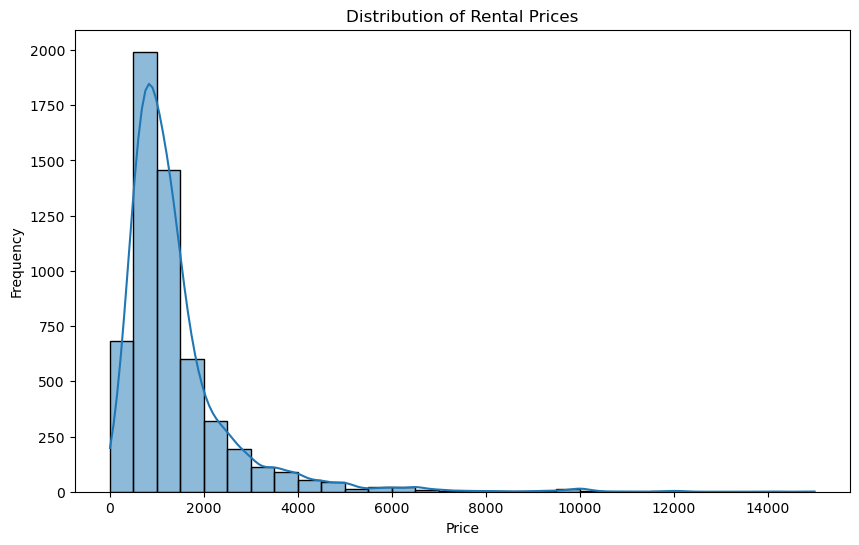

In [134]:
# visualization : 
# 1. a histogram to help understand the distribution of rent prices.
plt.figure(figsize=(10, 6))
sns.histplot(df_app['Price'], bins=30, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



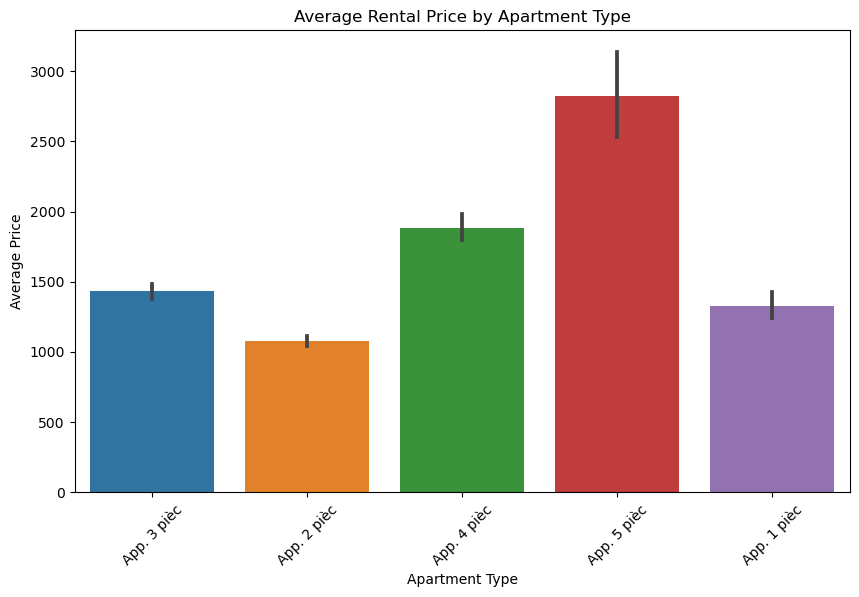

In [137]:
# A bar plot to compare average rent prices across different types of apartments.
import numpy as np 
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Price', data=df_app, estimator=np.mean)
plt.title('Average Rental Price by Apartment Type')
plt.xlabel('Apartment Type')
plt.ylabel('Average rent Price per month in TND')
plt.xticks(rotation=45)
plt.show()

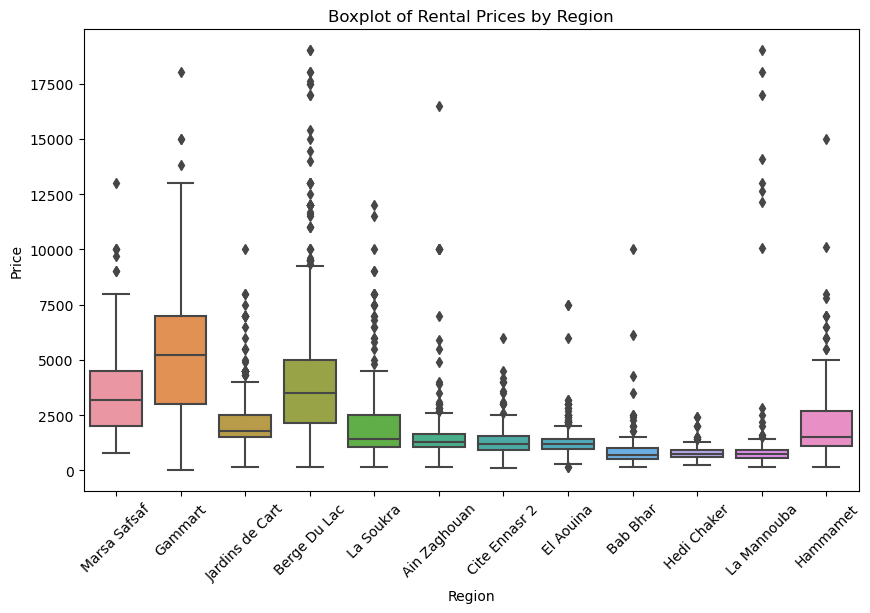

In [139]:
# Distribution by Region (box plot )
# Find the top 12 most common regions
top_regions = df_app['Region'].value_counts().nlargest(12).index
df_top_regions = df_rent_cleaned[df_rent_cleaned['Region'].isin(top_regions)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Price', data=df_top_regions)
plt.title('Boxplot of Rental Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()



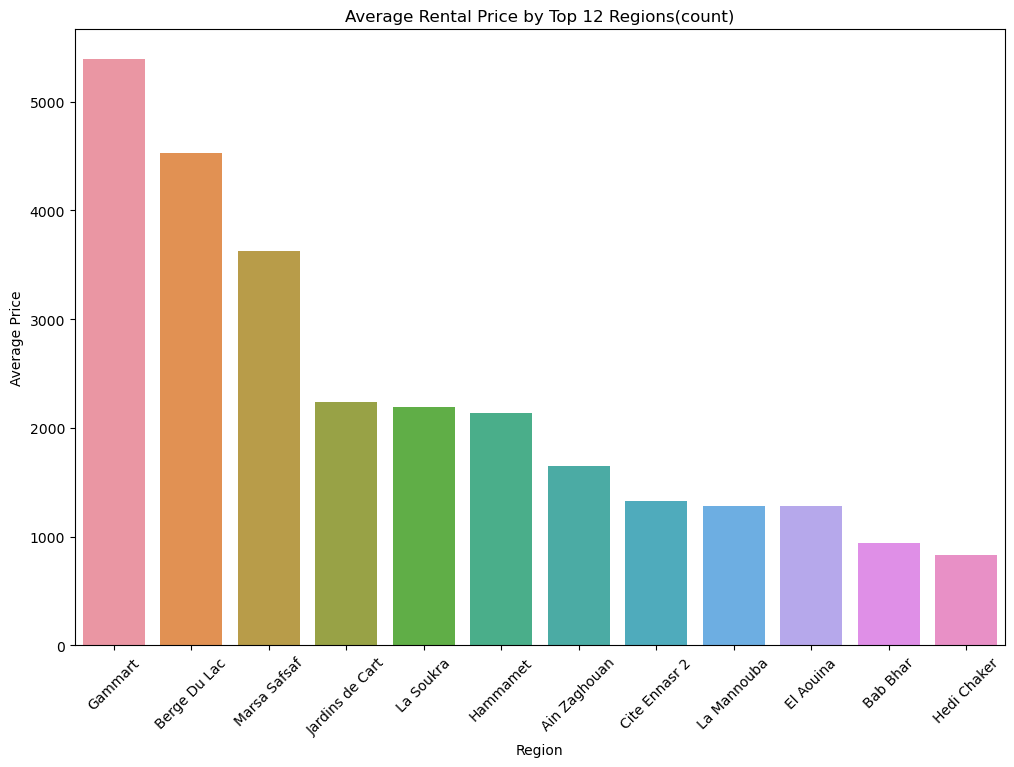

In [141]:
# Distribution by Region (Bar plot )
mean_prices_by_region = df_top_regions.groupby('Region')['Price'].mean().sort_values(ascending=False)

# Plotting the bar plot for the average rental prices by top 12 regions
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_prices_by_region.index, y=mean_prices_by_region.values)
plt.title('Average Rental Price by Top 12 Regions(count)')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [144]:
# deep dive into diffrent apartments sell prices 
unique_type_df_rent = df_sell['Type'].value_counts().to_frame()
unique_type_df_rent
df_sell_app = df_sell[df_sell['Type'].isin(['App. 2 pièc', 'App. 3 pièc', 'App. 1 pièc', 'App. 4 pièc','App. 5 pièc'])]

df_sell_app
# 2532 apartments listed  for sale  last 3 months 

,Region,Nature,Type,Description,Price,ModificationDate
2,Ain Zaghouan,Vente,App. 2 pièc,S1 ain zaghouan nord,265000,2024-06-03
79,Ben Arous,Vente,App. 3 pièc,Un appartement s3 avec u,320000,2024-06-03
82,La Soukra,Vente,App. 2 pièc,S2 la soukra pres hamadi,245000,2024-06-03
96,La Soukra,Vente,App. 2 pièc,S2 la soukra,245000,2024-06-03
102,Nouvelle Medina,Vente,App. 3 pièc,Un appartement s 3 avec,290000,2024-06-03
...,...,...,...,...,...,...
19460,Cite Ennasr 1,Vente,App. 3 pièc,Appartement s2,300000,2024-03-04
19463,Sousse Khezama,Vente,App. 3 pièc,Spacieux s2 proche de la,245000,2024-03-04
19464,Kerkouane,Vente,App. 1 pièc,Résidence tanit à plage,175000,2024-03-04
19469,Hammam El Gheza,Vente,App. 2 pièc,Résidence la sirène à pl,270000,2024-03-04


In [145]:
df_sell_app.describe()

,Price,ModificationDate
count,2.532000e+03,2532
mean,3.642307e+05,2024-05-03 21:28:09.099526144
min,5.870000e+02,2024-03-04 00:00:00
25%,1.797500e+05,2024-04-15 00:00:00
50%,2.600000e+05,2024-05-15 00:00:00
75%,3.800000e+05,2024-05-29 00:00:00
max,1.400000e+07,2024-06-03 00:00:00
std,5.651164e+05,NaN


In [2]:
# A bar plot to compare average sell prices across different types of apartments.

from matplotlib.ticker import FuncFormatter


# Define a formatter function to convert large numbers into 'k' format
def thousands_formatter(x, pos):
    return '%1.0fk' % (x * 1e-3)

# Calculate the mean price for each apartment type
mean_prices_by_type = df_sell_app.groupby('Type')['Price'].mean().sort_values(ascending=False)

# Plotting the bar plot for average sell prices by apartment type
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Price', data=df_sell_app, estimator=np.mean, order=mean_prices_by_type.index)
plt.title('Average Sell Price by Apartment Type')
plt.xlabel('Apartment Type')
plt.ylabel('Average Sell Price in TND')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xticks(rotation=45)
plt.show()


NameError: name 'df_sell_app' is not defined

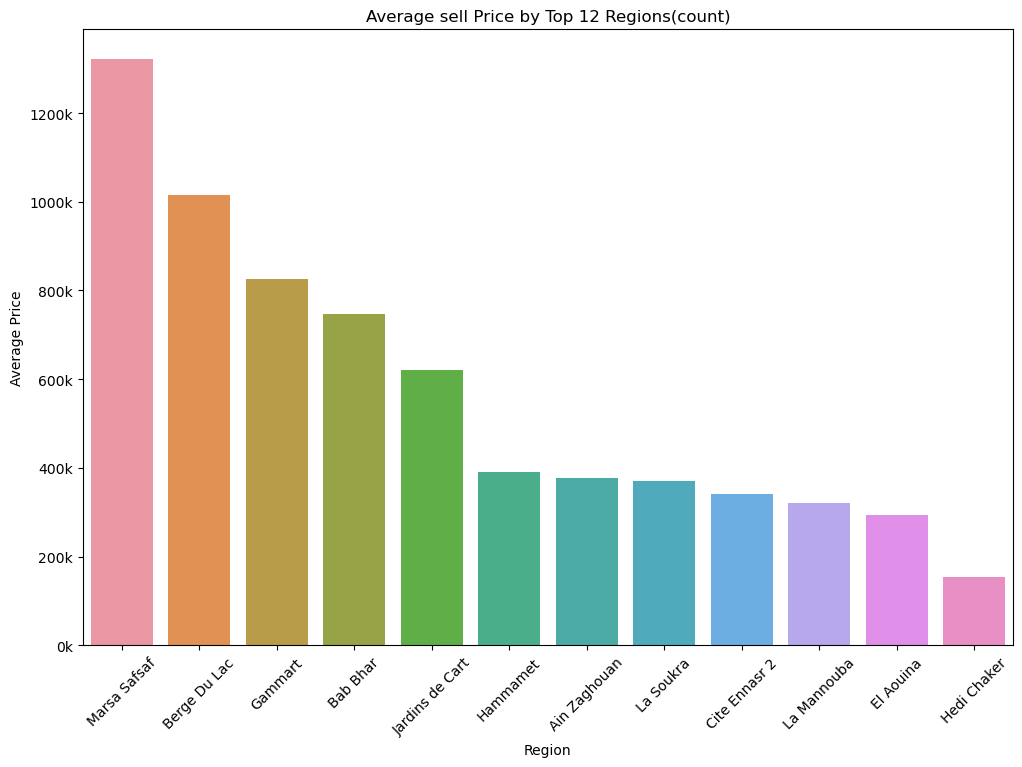

In [150]:
# Distribution by Region (Bar plot )
df_top_regions = df_sell_app[df_sell_app['Region'].isin(top_regions)]

mean_prices_by_region = df_top_regions.groupby('Region')['Price'].mean().sort_values(ascending=False)

# Plotting the bar plot for the average sell prices by top 12 regions
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_prices_by_region.index, y=mean_prices_by_region.values)
plt.title('Average sell Price by Top 12 Regions(count)')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xticks(rotation=45)
plt.show()


### Phase4

In [15]:
from IPython.display import display, HTML

html_code = """ 
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Apartment Price Distribution</title>
</head>
<body style="font-family: Arial, sans-serif; margin: 20px; background-color: #f4f4f9;">

<div class="container" style="max-width: 800px; margin: 0 auto; padding: 20px; background-color: #fff; box-shadow: 0 0 10px rgba(0,0,0,0.1); border-radius: 8px;">
    <h2 style="color: #333; border-bottom: 2px solid #e2e2e2; padding-bottom: 10px;">Distribution of Apartment Prices</h2>
    <div class="section" style="margin-bottom: 20px;">
        <p style="color: #666; line-height: 1.6;">The distribution of rent prices shows a significant concentration of apartment rent prices in the lower range (500 and 2000 dinars), with a few outliers at the higher end.</p>
    </div>

    <div class="section" style="margin-bottom: 20px;">
        <h3 style="color: #555; margin-bottom: 10px;">Price Comparison by Region:</h3>
        <table class="comparison-table" style="width: 100%; border-collapse: collapse; margin-top: 10px;">
            <tr>
                <th style="border: 1px solid #ddd; padding: 8px; text-align: left; background-color: #f2f2f2; color: #333;">Top Region by Average Selling Price</th>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Region: Marsa Safsaf</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Average Price: 1,300,000 TND</td>
            </tr>
            <tr>
                <th style="border: 1px solid #ddd; padding: 8px; text-align: left; background-color: #f2f2f2; color: #333;">Lowest Region by Average Selling Price</th>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Region: Hedi Chaker</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Average Price: 50,000 TND</td>
            </tr>
            <tr>
                <th style="border: 1px solid #ddd; padding: 8px; text-align: left; background-color: #f2f2f2; color: #333;">Percentage Difference</th>
                <td colspan="2" class="highlight" style="border: 1px solid #ddd; padding: 8px; text-align: left; color: #d9534f;">96.15%</td>
            </tr>
            <tr>
                <th style="border: 1px solid #ddd; padding: 8px; text-align: left; background-color: #f2f2f2; color: #333;">Top Region by Average Rent Price</th>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Region: Gammart</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Average Rent Price: 5,500 TND</td>
            </tr>
            <tr>
                <th style="border: 1px solid #ddd; padding: 8px; text-align: left; background-color: #f2f2f2; color: #333;">Lowest Region by Average Rent Price</th>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Region: Hedi Chaker</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: left;">Average Rent Price: 800 TND</td>
            </tr>
            <tr>
                <th style="border: 1px solid #ddd; padding: 8px; text-align: left; background-color: #f2f2f2; color: #333;">Percentage Difference</th>
                <td colspan="2" class="highlight" style="border: 1px solid #ddd; padding: 8px; text-align: left; color: #d9534f;">85.45%</td>
            </tr>
        </table>
    </div>
</div>

</body>
</html>
"""

display(HTML(html_code))
